Ignacio Vellido Expósito

### Ejercicio. Aproximación a la Compresión
Realizar sobre la imagen barbara una descomposición wavelet usando bior3.7 con tres niveles. Fijado un porcentaje de coeficientes, por ejemplo 10% del total de coeficientes, que  indica el porcentaje de coeficientes que nos quedamos de entre todos los coeficientes wavelets de la descomposición. El resto los ponemos a cero. Los coeficientes que mantenemos son los que tiene mayor magnitud.
Varias el porcentaje a (10,20,30,40,50,70,80 90) para:
<ul>
<li>Obtener una gráfica en la que en el eje X tenemos razón de compresión y en el eje Y el valor de PSNR entre la imagen original y la imagen reconstruida.
<li>Obtener una gráfica en la que se muestra el porcentaje de coeficientes que se han mantenido por banda. 
</ul>    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt

def imadjust(img, Out=(0,1.0), gamma=1.0):
    
    max_in = np.max(img)
    min_in = np.min(img)
    
    low_out, high_out = Out
     
    low_out *= 255.0
    high_out *= 255.0    
    
    k = (high_out - low_out) / (max_in - min_in)
         
    table = np.array([((i / 255.0) ** gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    h,w = img.shape[:2]
    imgOut = np.zeros((h,w),'float')
    
    for r in range(h):
        for c in range(w):
            res = int(k*(img[r,c]-min_in) + low_out)
            imgOut[r,c] = table[res]
               
    return imgOut

In [93]:
import cv2

# Función para mostrar varias imágenes en una sola ventana
import numpy as np
from matplotlib import pyplot as plt

def plot_vector_img(vim, titles=None, cols=0, suptitle=None, gray=False):
    """ Visualiza varias imágenes a la vez """
    n_images = len(vim)

    if not cols:
        cols = 7 if len(vim) >= 7 else len(vim)

    if titles is None:
        titles = ['' for i in range(1, n_images+1)]

    if suptitle is None:
          suptitle = ''

    fig = plt.figure()
    for n, (image, title) in enumerate(zip(vim, titles)):
        a = fig.add_subplot(int(np.ceil(n_images/float(cols))), cols, n+1)          
        plt.imshow(image, "gray" if gray else None)        

        a.set_title(title)        
        a.axis('off')

    fig.suptitle(suptitle)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    fig.subplots_adjust(bottom=0)

    plt.show()

In [148]:
import math

def PSNR(img1, img2):
    mse = np.mean((img1 - img2)**2)
    return 20 * math.log10(255.0 / math.sqrt(mse)) if mse != 0.0 else 1000

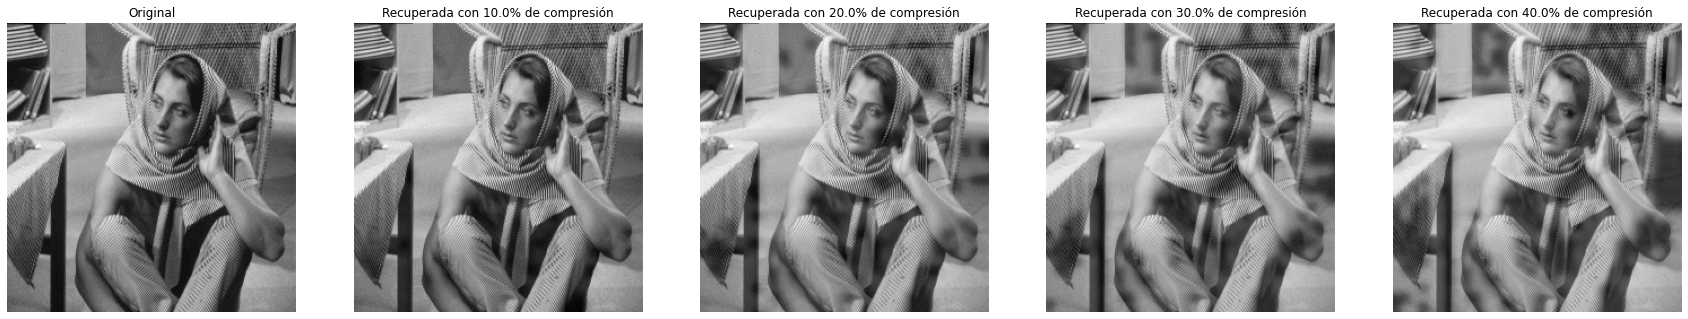

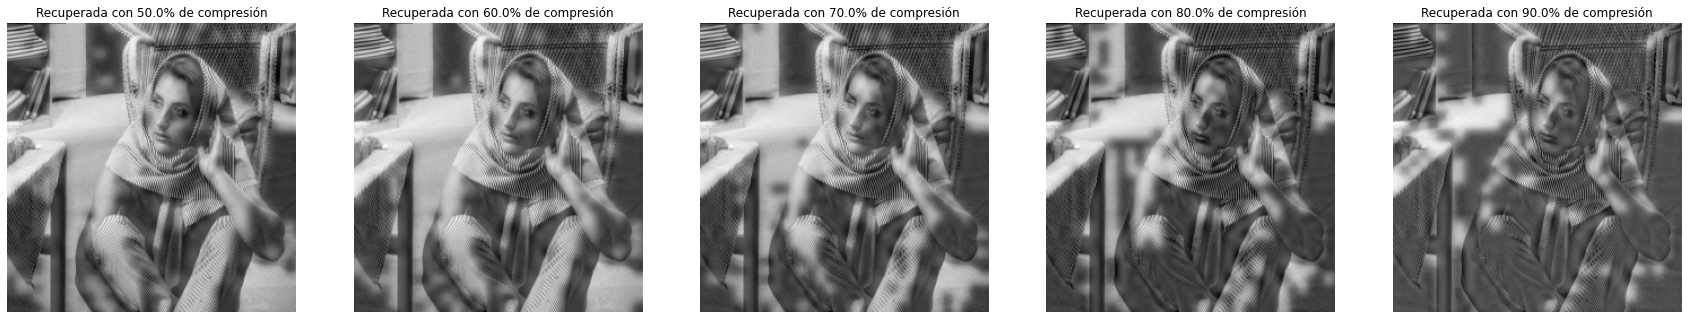

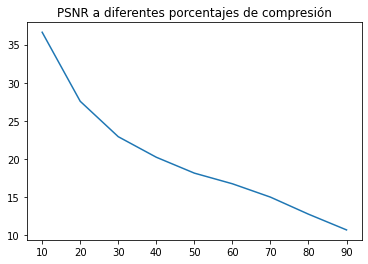

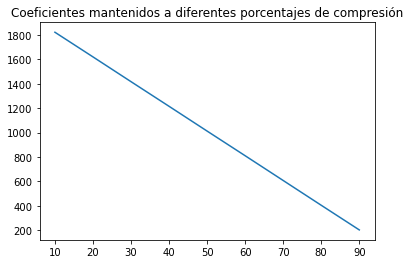

In [154]:
original = cv2.imread('barbara.png',0)

le = 3  # Niveles
coeffs = pywt.wavedec2(original, 'bior3.7', level=le)
LL = coeffs[0].copy()
(h,w) = LL.shape

# ------------------------------------------------------------------------------

vim = []
vim.append(original)
titles = []
titles.append("Original")
percentages = [.1,.2,.3,.4,.5,.6,.7,.8,.9]

errors = []
coefficients = []

for per in percentages:    
    # Calcular el número de pixeles
    top_N = int(h * w * (1-per))

    # Encontrar sus índices
    idx = np.argpartition(LL, LL.size - top_N, axis=None)[:-top_N]
    result = np.unravel_index(idx, LL.shape)

    # Guardar el número de coeficientes que se han mantenido
    coefficients.append((h*w) - len(result[0]))

    # Igualar a cero
    coeffs[0][result[0],result[1]] = 0

    # Recuperar la informacion 
    rec = pywt.waverec2(coeffs, 'bior3.7')
    vim.append(rec)
    titles.append("Recuperada con {}% de compresión".format(per*100))

    # Calcular el error
    errors.append(PSNR(original, rec))

    coeffs[0] = LL.copy()

# ------------------------------------------------------------------------------

plot_vector_img(vim[:5], titles=titles[:5], gray=True)
plot_vector_img(vim[5:], titles=titles[5:], gray=True)

plt.plot(np.arange(1,len(vim))*10, errors)
plt.title("PSNR a diferentes porcentajes de compresión")
plt.show()

plt.plot(np.arange(1,len(vim))*10, coefficients)
plt.title("Coeficientes mantenidos a diferentes porcentajes de compresión")
plt.show()